# PCA(주성분 분석)
### 고차원을 저차원으로 투영해서 분석
PCA로 변환된 데이터가 원본 데이터보다 더 나은 예측 정확도를 보이는 것은 항상 그런 것은 아닙니다.
PCA 변환 차원 개수에 따라 예측 성능이 떨어지기도 합니다.
4개의 속성이 2개의 속성이 되어도 예측 성능에 영향을 받지 않을 정도로 PCA 변환이 잘 되었음을 의미합니다.
다만, 고차원 데이터를 저차원으로 변환하면 직관적으로 이해하기 편하며, 데이터의 주축을 이루는 속성이 무엇인지 파악할 수 있습니다.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

# 한글폰트 출력 가능 코드
from matplotlib import rc
#rc('font', family='AppleGothic') # Mac Os
rc('font', family='NanumGothic') # Windows Os
plt.rcParams['axes.unicode_minus'] = False


In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisDF = pd.DataFrame(iris.data, columns=columns)
irisDF['target'] =iris.target

print(irisDF.shape)
irisDF.head()

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


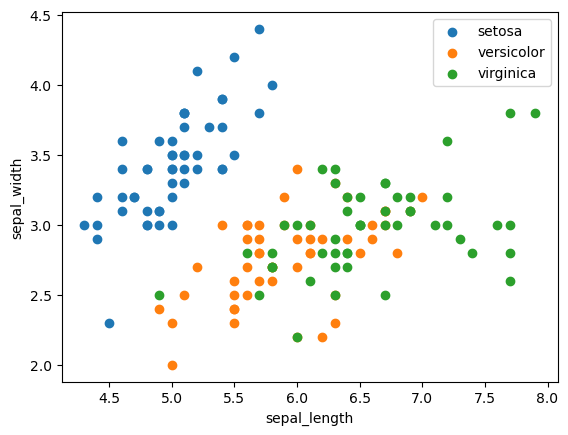

In [3]:
# target, color 지정

# 산점도 그래프 출력
# 2개만 지정했을 때
for i in range(0,3) :
    x_axis_data = irisDF[irisDF['target'] == i]['sepal_length']
    y_axis_data = irisDF[irisDF['target'] == i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data,  label=iris.target_names[i])
    
plt.legend()
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.show()

In [4]:
# 표준화 패키지 라이브러리 
from sklearn.preprocessing import StandardScaler

# feature, target 분류
feature = irisDF.drop(['target'], axis=1).values 
target = irisDF['target'].values 

# 스케일러 적용 후 저장
scale_feature = StandardScaler().fit_transform(feature)
scaled_data =pd.DataFrame(scale_feature, columns=['sepal_length', 'sepal width', 'petal length', 'petal width'])
scaled_data.head()
print(scaled_data.shape)

(150, 4)


In [5]:
# PCA 기법 적용 (라이브러리)
from sklearn.decomposition import PCA

# 주성분을 몇개로 할지 결정 (2개 주성분)
pca = PCA(n_components=2)
pca2_feature = pca.fit_transform(scale_feature)

# 주성분으로 이루어진 데이터 프레임 구성
pca2_data = pd.DataFrame(data=pca2_feature, columns = ['pca_1', 'pca_2'])
# pca2_data

# 새로운 데이터프레임 형성 (라벨값 업데이트)
finalDf = pca2_data
finalDf['target'] = irisDF.target.values
finalDf

,pca_1,pca_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0
...,...,...,...
145,1.870503,0.386966,2
146,1.564580,-0.896687,2
147,1.521170,0.269069,2
148,1.372788,1.011254,2


findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


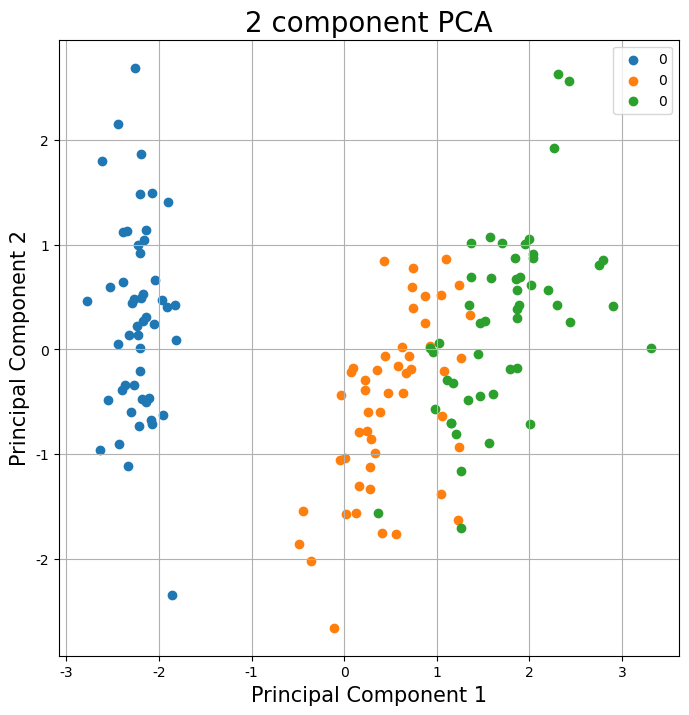

In [6]:
# 산점도 그래프 출력
plt.figure(figsize = (8, 8))
for i in range(0,3):
    x_axis_data = finalDf[finalDf['target'] == i]['pca_1']
    y_axis_data = finalDf[finalDf['target'] == i]['pca_2']
    plt.scatter(x_axis_data, y_axis_data,label=iris.target_names[i])
    
plt.xlabel('Principal Component 1', fontsize = 15)
plt.ylabel('Principal Component 2', fontsize = 15)
plt.title('2 component PCA', fontsize=20)
plt.legend(target)
plt.grid()
plt.show()

In [10]:
# interactive plot 출력

# 라이브러리 호출
import plotly.express as px
from sklearn.decomposition import PCA

# feature 지정
feature = irisDF[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

# PCA 기법 반영 (2차원으로 축소) 및 데이터 프레임 형성
pca = PCA(n_components=2)
components = pd.DataFrame(pca.fit_transform(feature))
components.columns = ['pca_1', 'pca_2']

# plotly 도표 생성
fig = px.scatter(components, x='pca_1', y='pca_2', color=irisDF['target'])
fig.show()

In [9]:

import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

feature = irisDF[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

pca = PCA(n_components=3)
components = pca.fit_transform(feature)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(components, x=0, y=1, z=2, color=irisDF['target'],
                    title=f'Total Explained Variance: {total_var:.2f}%',
                    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'})
fig.update_layout(height=500)
fig.show()

# LDA
### PCA와 유사하나 클래스간 분산과 클래스 내부 분산 행렬을 생성한 뒤 , 이 행렬에 기반해 고유벡터를 구하고 입력 데이터를 투영한다는 점이 차이점

In [27]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

iris = load_iris()
iris_scaled = StandardScaler().fit_transform(iris.data)

In [35]:
# Number of components (<= min(n_classes - 1, n_features)) for dimensionality reduction. If None, will be set to min(n_classes - 1, n_features). This parameter only affects the transform method.
lda = LinearDiscriminantAnalysis(n_components=2)

lda.fit(iris_scaled, iris.target)
iris_lda = lda.transform(iris_scaled)
print(iris_lda.shape)

irisDF_lda = pd.DataFrame(iris_lda)
irisDF_lda.columns = ['lda_1','lda_2']
irisDF_lda['target'] =iris.target
irisDF_lda

(150, 2)


,lda_1,lda_2,target
0,8.061800,0.300421,0
1,7.128688,-0.786660,0
2,7.489828,-0.265384,0
3,6.813201,-0.670631,0
4,8.132309,0.514463,0
...,...,...,...
145,-5.645003,1.677717,2
146,-5.179565,-0.363475,2
147,-4.967741,0.821141,2
148,-5.886145,2.345091,2


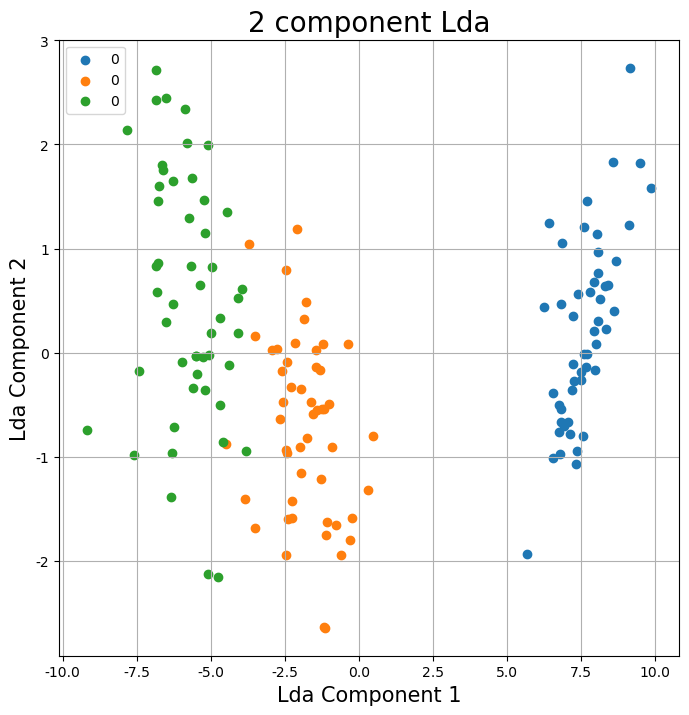

In [36]:
# 산점도 그래프 출력
plt.figure(figsize = (8, 8))
for i in range(0,3):
    x_axis_data = irisDF_lda[irisDF_lda['target'] == i]['lda_1']
    y_axis_data = irisDF_lda[irisDF_lda['target'] == i]['lda_2']
    plt.scatter(x_axis_data, y_axis_data,label=iris.target_names[i])
    
plt.xlabel('Lda Component 1', fontsize = 15)
plt.ylabel('Lda Component 2', fontsize = 15)
plt.title('2 component Lda', fontsize=20)
plt.legend(target)
plt.grid()
plt.show()